# DS-SF-27 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
# TODO
df.shape

(400, 4)

Answer: 400

> ### Question 2.  Create a summary table.

In [4]:
# TODO
df.describe()

/Users/general_assembly/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [5]:
# TODO
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: gre score data is more spread out than gpa score data. 

> ### Question 4.  Drop data points with missing data.

In [6]:
# TODO
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [7]:
df.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [8]:
# TODO
df.gre.isnull().sum()

2

In [9]:
df.columns[df.isnull().any()]

Index([u'gre', u'gpa', u'prestige'], dtype='object')

In [10]:
df.loc[df['gre'].isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [11]:
df.gpa.isnull().sum()

2

In [12]:
df.loc[df['gpa'].isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
236,1,660.0,NaN,NaN


Answer: by using .isnull.sum we find there are two null data and with the loc. command we can find where the null/NaN data are located. 

> ### Question 6.  Create boxplots for `gre` and `gpa`.

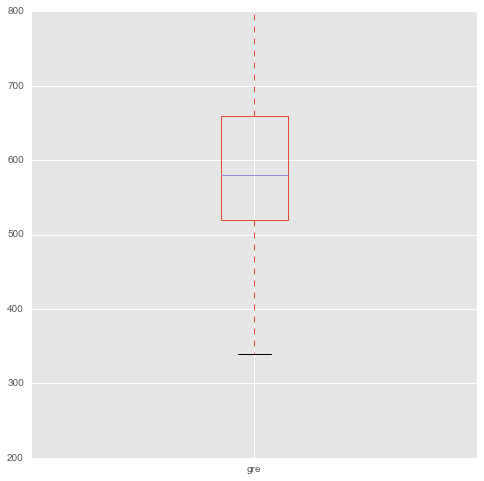

In [13]:
# TODO
df.gre.plot(kind = 'box', figsize = (8, 8))

In [14]:
df.gre.mean()

588.0402010050251

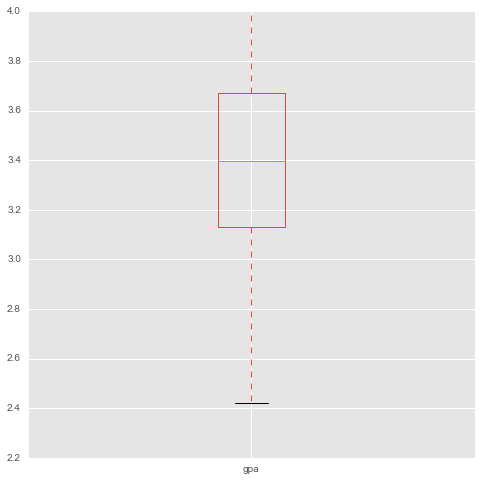

In [15]:
# TODO
df.gpa.plot(kind = 'box', figsize = (8, 8))

In [16]:
df.gpa.mean()

3.3909296482412077

> ### Question 7.  What do boxplots show?

Answer: The boxplots show the data distribution and the mean for gpa and gre scores. gpa and gre scores data are resonable distributed. Both data show longer lower whisker meaning that there are more data in the lower quartile, especially in the gre score data. It seems that the amount of lower values in gre score is causing a drop in the mean.

> ### Question 8.  Plot the distribution of each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b1b1150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b5bcbd0>]], dtype=object)

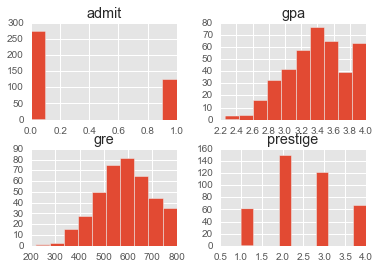

In [17]:
df.hist()

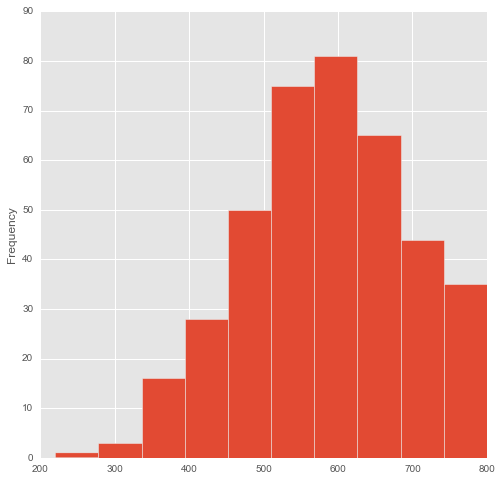

In [18]:
# TODO
df.gre.plot(kind = 'hist', figsize = (8, 8))

In [19]:
df.gre.var()
#has large variance meaning gre data is less consistent

13369.953039758006

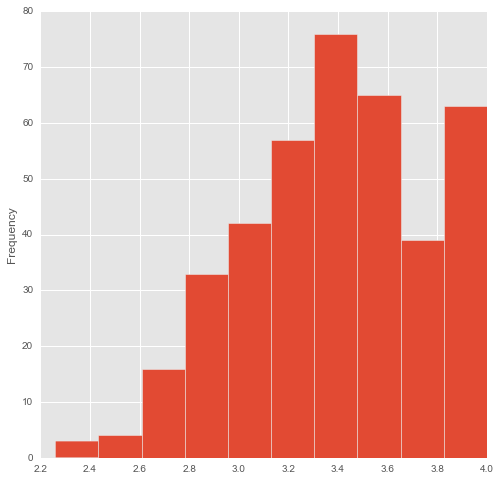

In [20]:
# TODO
df.gpa.plot(kind = 'hist', figsize = (8, 8))

In [21]:
df.gpa.var()

0.14487948622204228

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer: According to the histogram, gre and gpa seem to have normal distribution although both are skewed to the left (elongated tail to the left). The qqplot show a good fit indicating that gre and gpa have normal distribution, therefore, no correction is needed.

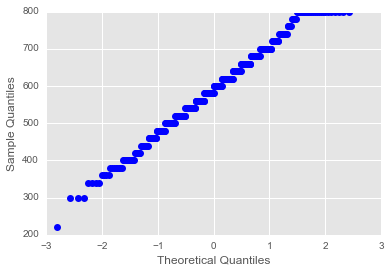

In [31]:
sm.qqplot(df.gre, line = 's')

pass

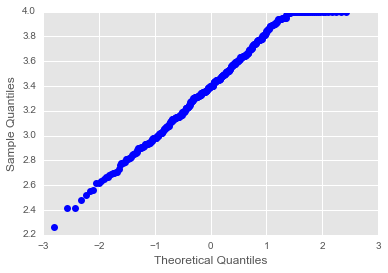

In [32]:
sm.qqplot(df.gpa, line = 's')

pass

> ### Question 10.  Create a correlation matrix for the dataset

In [22]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

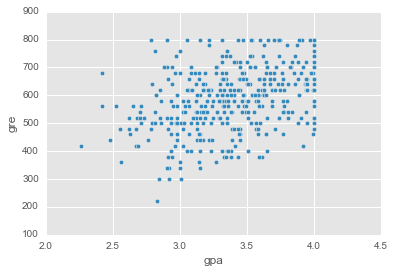

In [23]:
df.plot(kind = 'scatter', x = 'gpa', y = 'gre')

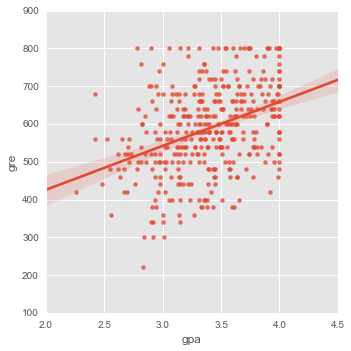

In [24]:
sns.lmplot(x = 'gpa', y = 'gre', data = df)

Answer:gpa and gre are potentially colinear. When plotted against each other, data points are scattered but it seems there is possibly a linear correlation among them. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

In [25]:
df.max()

admit         1.0
gre         800.0
gpa           4.0
prestige      4.0
dtype: float64

In [26]:
df.min()

admit         0.00
gre         220.00
gpa           2.26
prestige      1.00
dtype: float64

In [27]:
df.prestige.value_counts()

2.0    150
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

In [28]:
df.admit.value_counts()

0    273
1    127
Name: admit, dtype: int64

Answer: There is only one data point with highest gpa and gre score (75%). Checking the .max & .mim we see the values associated with admit and prestige. 

Admit has only two values (0,1), 0 meaning No admit and 1 admit.  Prestige has four values (1-4), the highest gre and gpa score are associated to value 4. 

If we check the value_counts for admit & prestige we see the number of students associated to each value. All the students who were admited (value 1 = 127 students) are associated with the highest prestige score, value of 4 and 3 (67 students and half of 121 students). 

> ### Question 13.  What is your hypothesis?

Answer: gre and gpa scores are a good measure for student admission to graduate school. Students with high gpa and gre scores come from prestige undergraduate schools (4 & 3).